In [2]:
# Python
import pandas as pd
import numpy as np
#
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.graph_objects as go

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('../../../data/df_monthly_returns_complete_percentage.csv', index_col='Date')

In [4]:
df_long = df.reset_index().melt(id_vars=['Date'], var_name='ticker', value_name='y')
df_long.rename(columns={'Date': 'ds'}, inplace=True)

# Allocate the last 5 years of data for testing
min_date = pd.to_datetime('today').replace(day=1) - pd.DateOffset(months=60)
min_datestr = min_date.strftime('%Y-%m-%d')
#
df_train = df.loc[df.index < min_datestr]
df_test = df.loc[df.index >= min_datestr]

### Training Prophet

### Plot

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


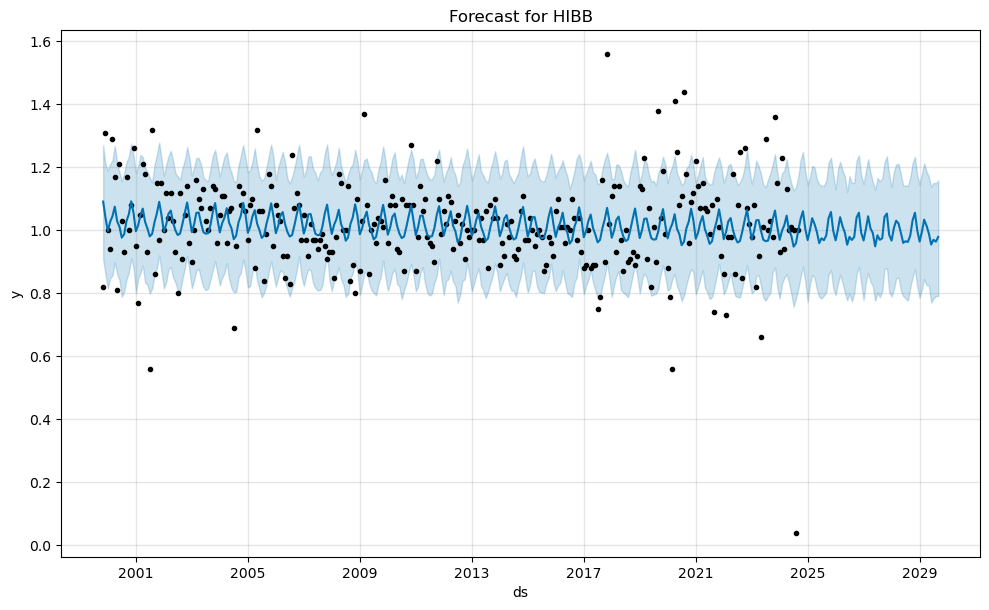

In [6]:
for ticker in [*forecasts][900:901]:
    fig = models[ticker].plot(forecasts[ticker])
    plt.title(f'Forecast for {ticker}')
    plt.show()

### 1 Month Actual vs Prediction

In [ ]:
# model
models = {}
forecasts = {}

for ticker, data in df_long.groupby('ticker'):
    model = Prophet()
    model.fit(data[['ds', 'y']])  # Train model

    future = model.make_future_dataframe(periods=60, freq='ME')  # Forecast next 12 months
    forecast = model.predict(future)

    models[ticker] = model
    forecasts[ticker] = forecast


In [7]:
max_date_1m = min_date + pd.DateOffset(months=1)
max_datestr_1m = max_date_1y.strftime('%Y-%m-%d')
#
df_test_1m = df.loc[df.index <= max_datestr_1m]

y_pred = forecasts['MSFT']['yhat'].values # [len(df):]
y_true = df_test_1m['MSFT'].values

min_date = pd.to_datetime('today').replace(day=1) - pd.DateOffset(months=1)
min_datestr = min_date.strftime('%Y-%m-%d')
#
train_true_list = y_pred[:len(df_train)]
test_true_list = y_pred[len(df_train):]

# Create the plot
fig = go.Figure()

# Add the timeseries line
fig.add_trace(go.Scatter(y=y_true, x=df_test_1m.index.tolist(), mode='lines', name='Actual returns',
                         line=dict(color='#5c839f', width=2)))  #, line=dict(color='red'))
# Add the training plot in red
fig.add_trace(go.Scatter(y=train_true_list, x=df_test_1m.index.tolist()[:len(df_train) + 1],
                         mode='lines', name='Train returns',
                         line=dict(color='red', width=2)))  #, line=dict(color='red')

# Add the testing plot in green
fig.add_trace(go.Scatter(y=test_true_list, x=df_test_1m.index.tolist()[len(df_train):],
                         mode='lines', name='Test returns',
                         line=dict(color='green', width=2)))  # , line=dict(color='green')

fig.add_vline(x=min_datestr, line_color='red', line_dash='dash', line_width=1)


# Update layout with labels
fig.update_layout(
    title='1 Year Prediction vs Actual Plot',
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Day closing return (%)',
        tickformat='.0%',
    ),
    legend=dict(title="Legend"),
    template="plotly_white"
)
fig.show()


NameError: name 'max_date_1y' is not defined

### 1 Year Actual vs Prediction

In [1]:
max_date_1y = min_date + pd.DateOffset(months=12)
max_datestr_1y = max_date_1y.strftime('%Y-%m-%d')
#
df_test_1y = df.loc[df.index <= max_datestr_1y]

y_pred = forecasts['MSFT']['yhat'].values # [len(df):]
y_true = df_test_1y['MSFT'].values

min_date = pd.to_datetime('today').replace(day=1) - pd.DateOffset(months=len(df)*0.2)
min_datestr = min_date.strftime('%Y-%m-%d')
#
train_true_list = y_pred[:len(df_train)]
test_true_list = y_pred[len(df_train):]

# Create the plot
fig = go.Figure()

# Add the timeseries line
fig.add_trace(go.Scatter(y=y_true, x=df_test_1y.index.tolist(), mode='lines', name='Actual returns',
                         line=dict(color='#5c839f', width=2)))  #, line=dict(color='red'))
# Add the training plot in red
fig.add_trace(go.Scatter(y=train_true_list, x=df_test_1y.index.tolist()[:len(df_train) + 1], 
                         mode='lines', name='Train returns',
                         line=dict(color='red', width=2)))  #, line=dict(color='red')

# Add the testing plot in green
fig.add_trace(go.Scatter(y=test_true_list, x=df_test_1y.index.tolist()[len(df_train):], 
                         mode='lines', name='Test returns',
                         line=dict(color='green', width=2)))  # , line=dict(color='green')

fig.add_vline(x=min_datestr, line_color='red', line_dash='dash', line_width=1)


# Update layout with labels
fig.update_layout(
    title='1 Year Prediction vs Actual Plot',
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Day closing return (%)',
        tickformat='.0%',
    ),
    legend=dict(title="Legend"),
    template="plotly_white"
)
fig.show()


NameError: name 'min_date' is not defined

### 5 Years Actual vs Prediction

In [ ]:
max_date_1y = min_date + pd.DateOffset(months=12)
max_datestr_1y = max_date_1y.strftime('%Y-%m-%d')
#
df_test_1y = df.loc[df.index <= max_datestr_1y]

y_pred = forecasts['MSFT']['yhat'].values # [len(df):]
y_true = df_test_1y['MSFT'].values

min_date = pd.to_datetime('today').replace(day=1) - pd.DateOffset(months=len(df)*0.2)
min_datestr = min_date.strftime('%Y-%m-%d')
#
train_true_list = y_pred[:len(df_train)]
test_true_list = y_pred[len(df_train):]

# Create the plot
fig = go.Figure()

# Add the timeseries line
fig.add_trace(go.Scatter(y=y_true, x=df_test_1y.index.tolist(), mode='lines', name='Actual returns',
                         line=dict(color='#5c839f', width=2)))  #, line=dict(color='red'))
# Add the training plot in red
fig.add_trace(go.Scatter(y=train_true_list, x=df_test_1y.index.tolist()[:len(df_train) + 1],
                         mode='lines', name='Train returns',
                         line=dict(color='red', width=2)))  #, line=dict(color='red')

# Add the testing plot in green
fig.add_trace(go.Scatter(y=test_true_list, x=df_test_1y.index.tolist()[len(df_train):],
                         mode='lines', name='Test returns',
                         line=dict(color='green', width=2)))  # , line=dict(color='green')

fig.add_vline(x=min_datestr, line_color='red', line_dash='dash', line_width=1)


# Update layout with labels
fig.update_layout(
    title='1 Year Prediction vs Actual Plot',
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Day closing return (%)',
        tickformat='.0%',
    ),
    legend=dict(title="Legend"),
    template="plotly_white"
)
fig.show()


### Sharpe Ratio

In [131]:
# @TODO resume here - get best performing stocks
# Create DataFrame of forecasted prices
forecasted_prices = pd.DataFrame({ticker: forecasts[ticker]['yhat'].values for ticker in forecasts})
forecasted_prices.index = forecasts['AAPL']['ds']

# Compute log returns
forecasted_returns = np.log(forecasted_prices / forecasted_prices.shift(1)).dropna()

# Calculate performance metrics
expected_returns = forecasted_returns.mean()  # Mean return per stock
volatility = forecasted_returns.std()  # Standard deviation of returns
sharpe_ratio = expected_returns / volatility  # Risk-adjusted return


/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning:

invalid value encountered in log

